#Цель задания предсказать зарплату сотрудника в зависимости от стажа работы

#Загрузим библиотеки

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Загрузим датасет

In [3]:
df = pd.read_csv('/content/Salary_dataset.csv')

#Проверим null - значения

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


#Посмотрим на датасет, чтобы в дальнейшем отфильтровать необходимые значения

In [5]:
df.head(30)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


Вывод: в датасете находятся подходящие значения

In [27]:
df = df.drop('Unnamed: 0', axis = 1)

#Проверим есть ли корреляция в нашем датасете

In [29]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: title={'center': 'График корреляции переменных'}, xlabel='YearsExperience', ylabel='Salary'>

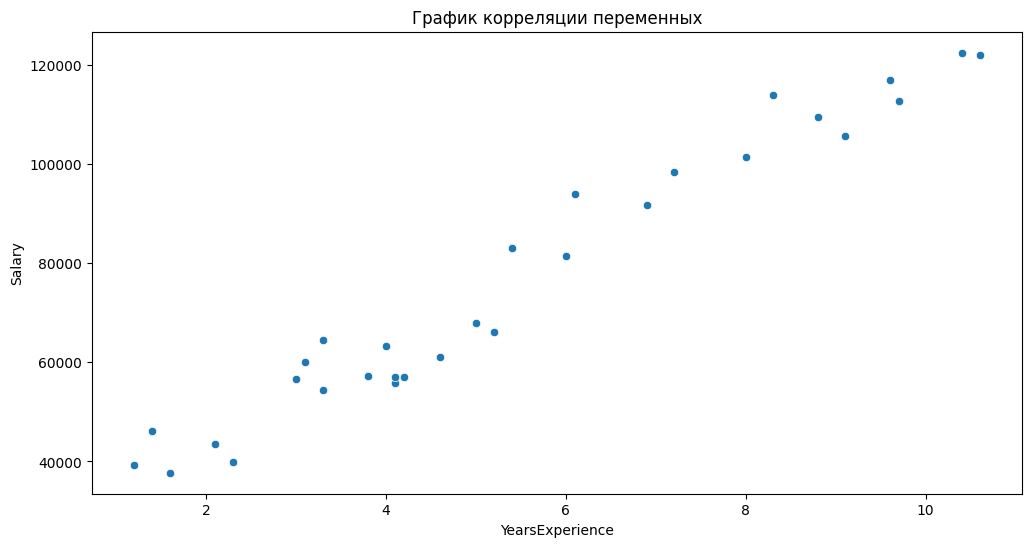

In [25]:
plt.figure(figsize = (12,6))
plt.title('График корреляции переменных')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])

#Загрузим библиотеку и обучим модель

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()

In [9]:
x= df[['YearsExperience']]
y = df[['Salary']]

In [10]:
reg.fit(x,y)

LinearRegression()

In [11]:
y_pred = reg.predict(x)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#По параметру средней квадратичной ошибки оценим модель

In [13]:
from sklearn.metrics import mean_squared_error

In [20]:
rmse = np.sqrt(mean_squared_error(y, y_pred))

In [21]:
rmse

5592.04360876066

#Попробуем улучшить модель с помощью метода стандартизации, регуляризации, отбора переменных

In [44]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('/content/Salary_dataset.csv')

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, data['Salary'], test_size=0.2)

# Стандартизация
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Регуляризация
ridge = RidgeCV(alphas=np.logspace(-4, 4, 100))
ridge.fit(X_train, y_train)

# Отбор переменных
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)

# Оценка качества модели
print('RMSE со стандартизацией, регуляризацией и отбором переменных:', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))


RMSE со стандартизацией, регуляризацией и отбором переменных: 0.16189625000813135


Результат работы: посторили модель, предсказывающую размер заработный платы нового сотрудника в зависимости от стажа работы